In [1]:
x = 1:5
collect(x)

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [2]:
k = (0:2)'
collect(k)

1×3 Matrix{Int64}:
 0  1  2

In [3]:
A = (1:5) .^ (0:2)'

5×3 Matrix{Int64}:
 1  1   1
 1  2   4
 1  3   9
 1  4  16
 1  5  25

In [4]:
y = @. 1 + 2x + 3x^2+ 0.3rand()

5-element Vector{Float64}:
  6.037459871406346
 17.089345180272716
 34.13840353187298
 57.03700329149604
 86.18080647712796

In [5]:
betahat = A \ y

3-element Vector{Float64}:
 1.0429868544122407
 2.00913063445781
 3.002384082968141

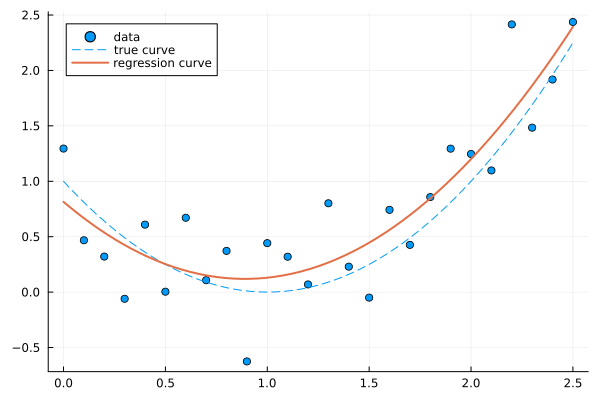

In [6]:
using StatsPlots

x = range(0, 2.5, 26)
f(x) = x^2 - 2x + 1
y = @. f(x) + 0.3randn()

A = x .^ (0:2)'
betahat = A \ y 

scatter(x, y; label="data", c=1)
plot!(f; label="true curve", c=1, ls=:dash)
plot!(x -> evalpoly(x, betahat); label="regression curve", c=2, lw=2)

In [7]:
X = 10^8:-1:1
f(x) = sin(x)/x

1 + 2sum(f.(X))
@time 1 + 2sum(f.(X))
@time 1 + 2sum(f.(X))
@time 1 + 2sum(f.(X))

  2.741178 seconds (6 allocations: 762.940 MiB, 1.42% gc time)
  2.744951 seconds (6 allocations: 762.940 MiB, 2.11% gc time)
  2.797498 seconds (6 allocations: 762.940 MiB, 3.38% gc time)


3.1415926695579026

In [8]:
1 + 2sum(f, X)
@time 1 + 2sum(f, X)
@time 1 + 2sum(f, X)
@time 1 + 2sum(f, X)

  2.706372 seconds (5 allocations: 112 bytes)
  2.603048 seconds (5 allocations: 112 bytes)
  2.623324 seconds (5 allocations: 112 bytes)


3.1415926695579026

In [9]:
using LoopVectorization

1 + 2vsum(f, X)
@time 1 + 2vsum(f, X)
@time 1 + 2vsum(f, X)
@time 1 + 2vsum(f, X)

  0.253360 seconds (3 allocations: 48 bytes)
  0.284388 seconds (3 allocations: 48 bytes)
  0.290188 seconds (3 allocations: 48 bytes)


3.1415926695579026

In [10]:
maximum(sin, X)

0.9999999999999997

In [11]:
minimum(sin, X)

-0.9999999999999999

In [12]:
using Statistics

mu = mean(sin, X)

1.713649346570601e-8